In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2023-09-23 10:30:32--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: 'housing.csv.17'

     0K .......... .......... .......... .......... ..........  3%  495K 3s
    50K .......... .......... .......... .......... ..........  7% 1,20M 2s
   100K .......... .......... .......... .......... .......... 10%  958K 2s
   150K .......... .......... .......... .......... .......... 14% 1,17M 1s
   200K .......... .......... .......... .......... .......... 17% 1,17M 1s
   250K .......... .......... .......... .......... .......... 21% 1,20M 1s
   300K .......... .......... .......... .......... .......... 25% 1,17M 1s
   350K .......... ..........

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

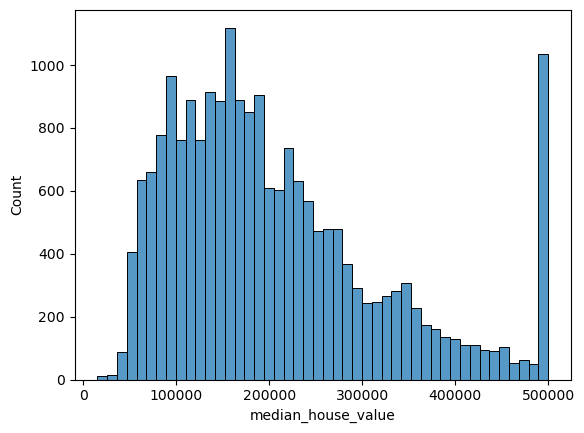

In [6]:
sns.histplot(df.median_house_value)

In [7]:
df_subset = df[(df['ocean_proximity'] == 'INLAND') | (df['ocean_proximity'] == '<1H OCEAN')]
df_subset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
del df_subset['ocean_proximity']
df_subset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [9]:
df_subset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [10]:
df_subset['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

Question 3

In [11]:
n = len(df_subset)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [12]:
idx = np.arange(n)

In [13]:
np.random.seed(42)
np.random.shuffle(idx)

In [14]:
df_train = df_subset.iloc[idx[:n_train]]
df_val = df_subset.iloc[idx[n_train:n_train+n_val]]
df_test = df_subset.iloc[idx[n_train+n_val:]]

In [15]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [16]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [17]:
column = df_train.total_bedrooms.fillna(0)

In [18]:
df_train_zeros = df_train.copy()
df_train_zeros.total_bedrooms = column

In [19]:
m = df_train.total_bedrooms.mean()
df_train_mean = df_train.copy()
df_train_mean.total_bedrooms = df_train.total_bedrooms.fillna(m)

In [20]:
X_df_train_zeros = df_train_zeros.values

In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [22]:
prepare_df_val = df_val.fillna(0).values

In [23]:
w0, w = train_linear_regression(X_df_train_zeros, y_train)
y_pred_zeros = w0 + prepare_df_val.dot(w)

In [24]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [25]:
error_zeros = rmse(y_val, y_pred_zeros)
error_zeros.round(2)

0.34

In [26]:
X_df_train_mean = df_train_mean.values
w0, w = train_linear_regression(X_df_train_mean, y_train)
y_pred_mean = w0 + prepare_df_val.dot(w)

In [27]:
error_mean = rmse(y_val, y_pred_mean)
error_mean.round(2)

0.34

Question 4

In [28]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [29]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_df_train_zeros, y_train, r=r)
    y_pred = w0 + prepare_df_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score.round(2))

0 -9.763249477769088 0.34
1e-06 -9.763228830871164 0.34
0.0001 -9.761185236073864 0.34
0.001 -9.742646249816385 0.34
0.01 -9.561056193388234 0.34
0.1 -8.058889769606484 0.34
1 -3.133154278461814 0.34
5 -0.841086797513227 0.35
10 -0.4381172315678242 0.35


Question5

In [30]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for s in seeds:
    idx_arr = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx_arr)
    df_train = df_subset.iloc[idx_arr[:n_train]]
    df_val = df_subset.iloc[idx_arr[n_train:n_train+n_val]]
    df_test = df_subset.iloc[idx_arr[n_train+n_val:]]
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)
    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append(score)

np.std(scores)

0.00405278649564694

Question 6

In [31]:
idx2 = np.arange(n)

In [32]:
np.random.seed(9)
np.random.shuffle(idx2)

In [33]:
df_train = df_subset.iloc[idx2[:n_train]]
df_val = df_subset.iloc[idx2[n_train:n_train+n_val]]
df_test = df_subset.iloc[idx2[n_train+n_val:]]

In [34]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [35]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [36]:
df_full_train = pd.concat([df_train, df_val])

In [37]:
X_full_train = df_full_train.fillna(0).values

In [38]:
y_full_train = np.concatenate([y_train, y_val])

In [39]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [40]:
X_test = df_test.fillna(0).values

In [41]:
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.3349899336608706